In [1]:
# Import Required packges
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Load Dataset
df_copy = pd.read_csv("../data/Titanic-Dataset.csv")

# Creating copy of data for backup
df = df_copy

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get some highlevel information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Describe the dataset values to get more insights
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


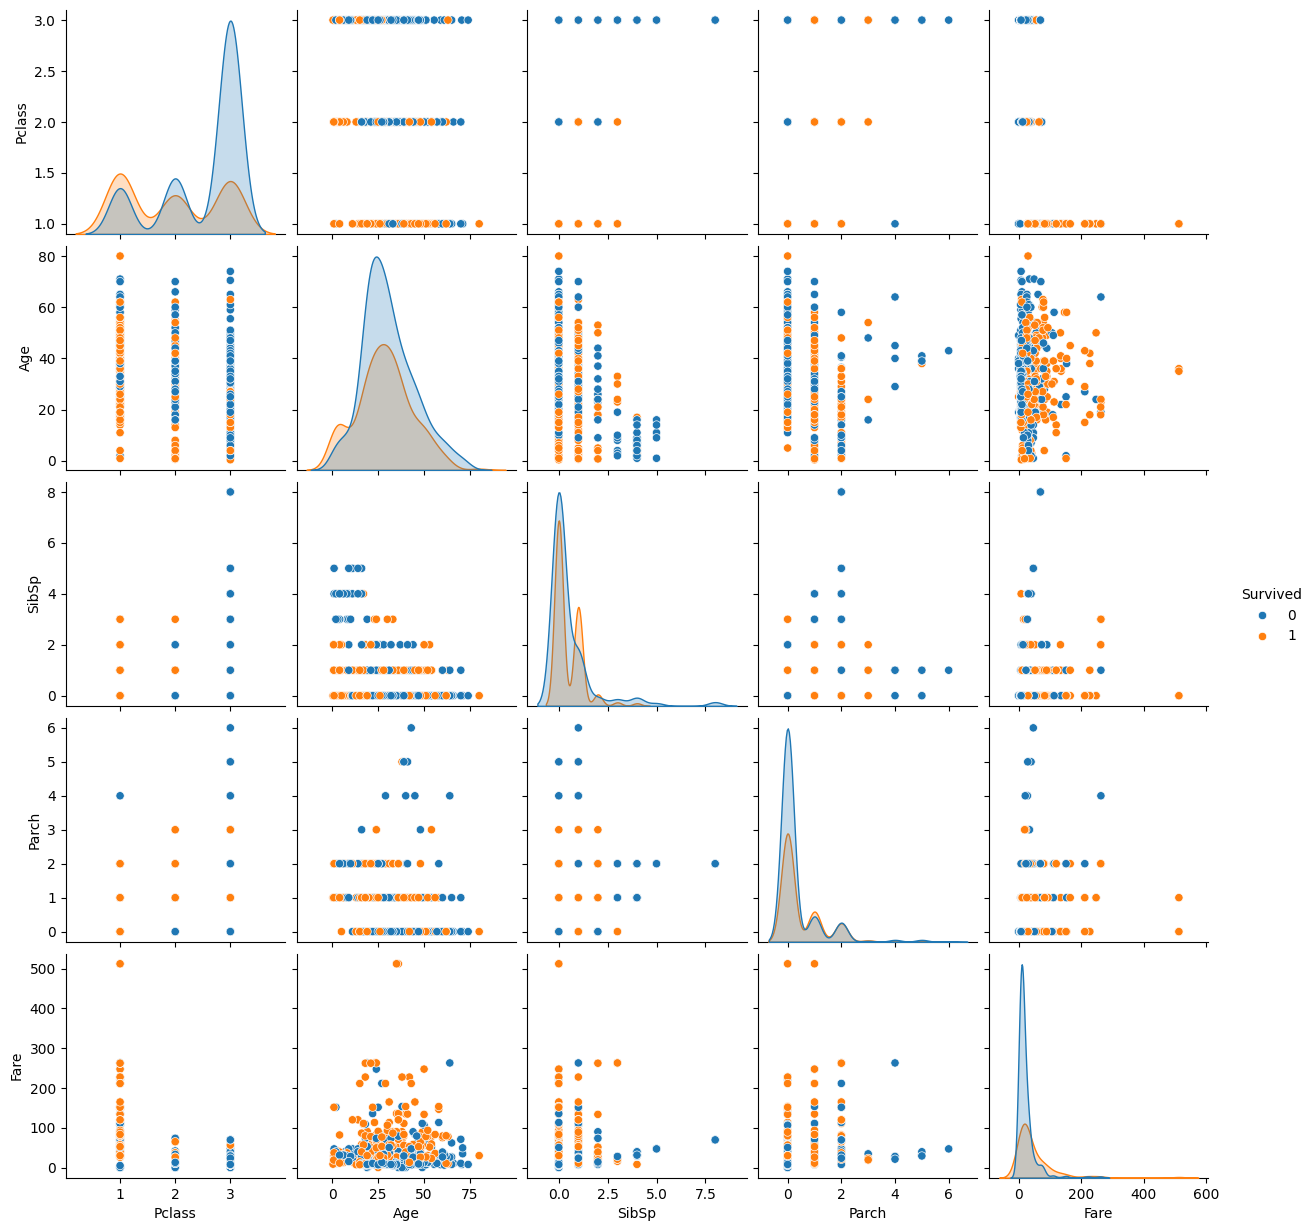

In [6]:
# Visualize different aspects of Dataset

sns.pairplot(data=df.drop('PassengerId', axis=1), kind='scatter', hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

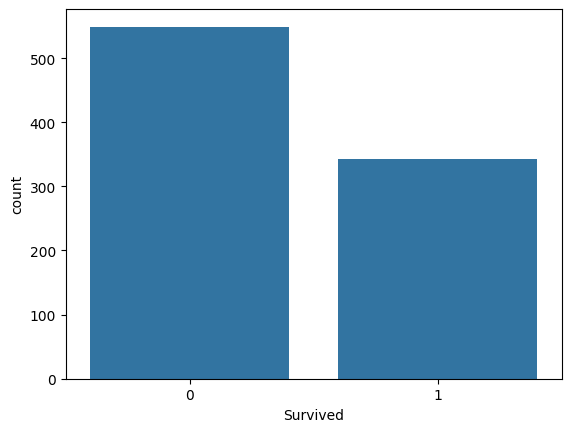

In [7]:
# Count survival numbers
sns.countplot(data=df, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

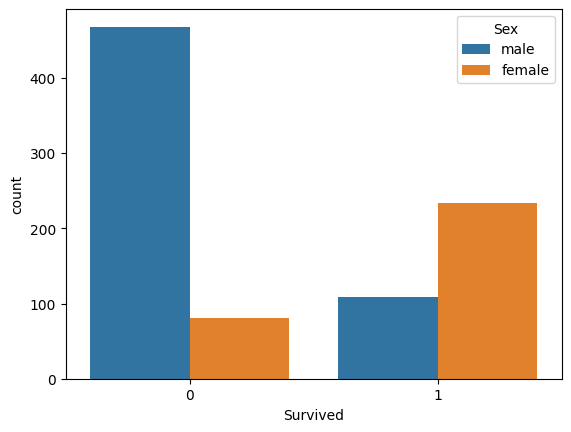

In [8]:
# Survival count based on sex
sns.countplot(data=df, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

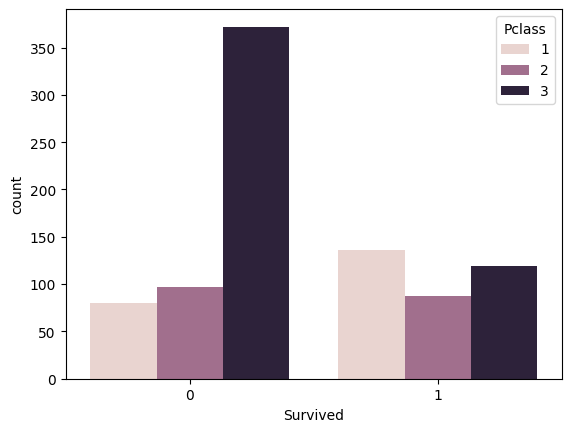

In [9]:
# Survival count from different class
sns.countplot(data=df, x='Survived', hue='Pclass')

### From above EDA, there are few observations that came to light as below.
1. Less than 40% of total passengers survived
2. Passenger who paid more fare and were in 1st class survived the most as compare to 2nd and 3rd class.
3. Cabin has missing data and doesn't add any value in prediction
4. Ticket, Parch, SibSp, Embarked column also don't have any value addition in outcome of this prediction
5. There are some values missing in Age column as well

# Data Cleaning and Pre-processing

In [10]:
# Based on above observation, drop "Cabin" and "Ticket" columns
df = df.drop(columns=['Cabin', 'Ticket', 'Parch', 'SibSp', 'Embarked'], axis=1)

In [11]:
# Drop Name column as well, as prediction will not be decided based on it
df = df.drop(columns=['Name'], axis=1)

In [12]:
# Fill NA value for age not available
# Convert to numeric, set errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill NaN with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
# PassengerId doesn't require in dataset
df = df.drop(columns=['PassengerId'], axis=1)

In [14]:
# Deal with labeled data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


# Training Data on different model

In [16]:
# Import Standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_scaled = scaler.fit_transform(X)

In [18]:
# Split data in train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 101)

In [19]:
# Basic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [20]:
# Import Regression Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Create Helper functions as below for reusability

In [21]:
# train and predict
def train_predict(model):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    return train_pred, test_pred

def get_error_metrics(label, prediction):
    accuracy  = accuracy_score(label, prediction)
    confu_matrix = confusion_matrix(label, prediction)
    class_report = classification_report(label, prediction)

    print("Accuracy Score is: ", accuracy)
    print("Confusion Metrics is: \n", confu_matrix)
    print("Classification Report is: \n", class_report)

In [22]:
# Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=101)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(logistic_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.8053892215568862
Confusion Metrics is: 
 [[363  59]
 [ 71 175]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       422
           1       0.75      0.71      0.73       246

    accuracy                           0.81       668
   macro avg       0.79      0.79      0.79       668
weighted avg       0.80      0.81      0.80       668


 Test Data Error Metrics 

Accuracy Score is:  0.757847533632287
Confusion Metrics is: 
 [[107  20]
 [ 34  62]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       127
           1       0.76      0.65      0.70        96

    accuracy                           0.76       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.76      0.75       223



In [23]:
# KNN Classifier model
knn_model = KNeighborsClassifier()

# Train model and predict on train & test data
train_pred, test_pred = train_predict(knn_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.8592814371257484
Confusion Metrics is: 
 [[379  43]
 [ 51 195]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       422
           1       0.82      0.79      0.81       246

    accuracy                           0.86       668
   macro avg       0.85      0.85      0.85       668
weighted avg       0.86      0.86      0.86       668


 Test Data Error Metrics 

Accuracy Score is:  0.8116591928251121
Confusion Metrics is: 
 [[113  14]
 [ 28  68]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       127
           1       0.83      0.71      0.76        96

    accuracy                           0.81       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



#### I tried using l1 and l2 in combination with Elastic Net, however, the outcome is not significant as compare to Linear Regression.

In [24]:
# Decision Tree Regressor
decision_tree_model = DecisionTreeClassifier(random_state=101)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(decision_tree_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.9820359281437125
Confusion Metrics is: 
 [[419   3]
 [  9 237]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.99      0.96      0.98       246

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


 Test Data Error Metrics 

Accuracy Score is:  0.7802690582959642
Confusion Metrics is: 
 [[110  17]
 [ 32  64]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       127
           1       0.79      0.67      0.72        96

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [25]:
# Random Forest Regression
random_forest_model = RandomForestClassifier(random_state=101)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(random_forest_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.9820359281437125
Confusion Metrics is: 
 [[416   6]
 [  6 240]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       422
           1       0.98      0.98      0.98       246

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


 Test Data Error Metrics 

Accuracy Score is:  0.8161434977578476
Confusion Metrics is: 
 [[113  14]
 [ 27  69]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       127
           1       0.83      0.72      0.77        96

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [26]:
# Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingClassifier(random_state=101)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(gradient_boosting_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.8982035928143712
Confusion Metrics is: 
 [[399  23]
 [ 45 201]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       422
           1       0.90      0.82      0.86       246

    accuracy                           0.90       668
   macro avg       0.90      0.88      0.89       668
weighted avg       0.90      0.90      0.90       668


 Test Data Error Metrics 

Accuracy Score is:  0.8251121076233184
Confusion Metrics is: 
 [[117  10]
 [ 29  67]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       127
           1       0.87      0.70      0.77        96

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.83      0.83      0.82       223



In [27]:
# Adaboost Regressor
adaboost_model = AdaBoostClassifier(random_state=101)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(adaboost_model)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.8158682634730539
Confusion Metrics is: 
 [[367  55]
 [ 68 178]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       422
           1       0.76      0.72      0.74       246

    accuracy                           0.82       668
   macro avg       0.80      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668


 Test Data Error Metrics 

Accuracy Score is:  0.7757847533632287
Confusion Metrics is: 
 [[110  17]
 [ 33  63]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.81       127
           1       0.79      0.66      0.72        96

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.77       223



#### Gradient Boosting Classifier has highest accuracy of 83% on test data and has small difference of 7% between training and test data accuracy as compare to other models.

In [28]:
# Implement GridSearch CV on Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=101)
param_grid = {'learning_rate': [0.1, 0.01, 0.001, 0.05, 1], 'n_estimators': [100, 200, 300], 'max_depth': [2, 3, 4, 5, 6, 7]}

grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5)

# Train model and predict on train & test data
train_pred, test_pred = train_predict(grid_search)

# Get error metrics of training data
print("Training Data Error Metrics \n")
get_error_metrics(y_train, train_pred)

print("============================")
# Get error metrics of test data
print("\n Test Data Error Metrics \n")
get_error_metrics(y_test, test_pred)

Training Data Error Metrics 

Accuracy Score is:  0.9311377245508982
Confusion Metrics is: 
 [[405  17]
 [ 29 217]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       422
           1       0.93      0.88      0.90       246

    accuracy                           0.93       668
   macro avg       0.93      0.92      0.93       668
weighted avg       0.93      0.93      0.93       668


 Test Data Error Metrics 

Accuracy Score is:  0.8295964125560538
Confusion Metrics is: 
 [[118   9]
 [ 29  67]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       127
           1       0.88      0.70      0.78        96

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



## In coclusion, it can be noticed from above implementation of various algorithms that Gradient Boosting Classifier has the best accuracy on test data out of all other algorithms. In addition, it doesn't get better with hyper paramter tuning. 

In [29]:
# Save the model
import joblib

joblib.dump(grid_search, 'Titanic_Survival_Prediction.pkl')

['Titanic_Survival_Prediction.pkl']

In [40]:
# Load the model
model = joblib.load('Titanic_Survival_Prediction.pkl')

sample = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [22],
    'Fare': [10.25]
})

predicted_survival = model.predict(sample)[0]

print(f"Predicted Survival: {predicted_survival}")

Predicted Survival: 0


/Users/vivek/Documents/Vivek/Learning/AI/ML_Projects/Supervised_ML/Titanic_Survival_Prediction/vp_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
